In [157]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [158]:
df = pd.read_csv('log.csv')

In [159]:
df["duration_ms"] = df["duration_ns"] / 1000000
del df["duration_ns"]
del df["instance"]

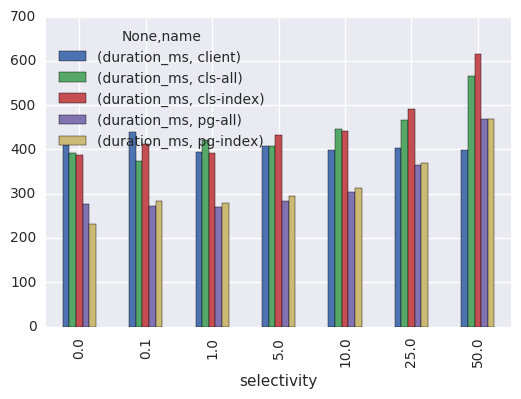

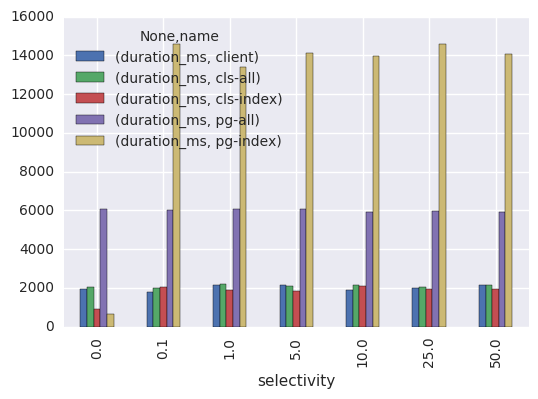

In [161]:
df2 = df.groupby(["name", "selectivity", "hotcache"]).mean()
#df2.unstack(level=[2, 0]).swaplevel(axis=1)
df3 = df2.reset_index()
df3[df3.hotcache == True][["name", "selectivity", "duration_ms"]].groupby(["name", "selectivity"]).mean().unstack(level=0).plot.bar()
df3[df3.hotcache == False][["name", "selectivity", "duration_ms"]].groupby(["name", "selectivity"]).mean().unstack(level=0).plot.bar()